Author: Thomas M. Breuel
Title: Associative Memories
Institution: UniKL

In [4]:
from pylab import *
import tables

Input Patterns
==============

As input patterns, we use images from the MNIST database.
We're not performing character recognition with this database here,
but just using the digits as simple patterns.
(We will be performing true character recognition later.)

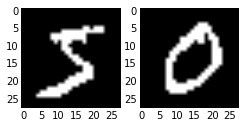

In [8]:
h5 = tables.openFile("mnist.h5","r")
images = h5.root.images[:100,:,:].copy()
images = array([1.0*(image>0.5) for image in images])
w,h = images[0].shape
n = w*h
def cshow(image): imshow(image.reshape(w,h))
gray()
subplot(131); cshow(images[0])
subplot(132); cshow(images[1])

Willshaw Associative Memory
===========================

Willshaw's associative memory (or perhaps Steinbuch's Lernmatrix) is a very
simple example of an associative learning rule, developed in the early 1960's.

We're considering a grid of n binary inputs $x\in \\{0,1\\}^n$
and n binary outputs $y\in \\{0,1\\}^n$.

The output is determined as 

$y = \theta(C \cdot x)$

Where $\theta$ is a threshold function and $C$ is an $n\times n$ matrix.

Given training patterns $\xi^{(k)}$, the entries of $C$ are determined as:

$C_{ij} = \min(1,\sum_k \xi_i^{(k)} \xi_j^{(k)})$

The goal of this associative memory is that if a partial or corrupted
version of one of the training vectors $\xi^{(k)}$ is presented,
the original training vector is reproduced.

Note the close connection with two aspects of neurons:

- output values are a thresholded sum of the inputs, just as in the McCulloch-Pitts neurons
- the training rule for the $C_{ij}$ is a _Hebbian rule_: the value increases if input and output are active simultanously

There has been a lot of work on this particular memory, determining
its capacity etc.

We are just going to train two patterns here to keep things simple and robust.

The capacity of this associative memory is fairly limited in this example because
the patterns don't satisfy the randomness and sparsity criteria that make
Willshaw's associative memory work better than this. 

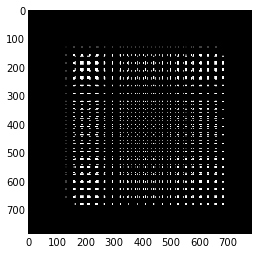

In [9]:
C = zeros((n,n))
for i in range(2): C += outer(images[i].flat,images[i].flat)
C = minimum(1,C)
imshow(C)

Now we can reconstruct patterns from corrupted inputs.

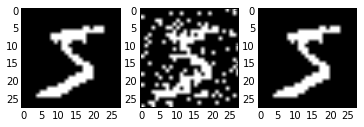

In [10]:
subplot(131); cshow(images[0])
corrupted = (images[0].flat+0.5*randn(n)>0.5)
subplot(132); cshow(corrupted)
out = dot(C,corrupted)
subplot(133); cshow(out>0.7*amax(out))

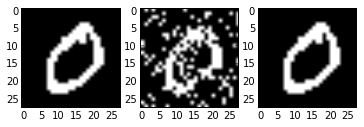

In [11]:
subplot(131); cshow(images[1])
corrupted = (images[1].flat+0.5*randn(n)>0.5)
subplot(132); cshow(corrupted)
out = dot(C,corrupted)
subplot(133); cshow(out>0.7*amax(out))

"Hopfield" Network
==================

(Hopfield Networks)

The Hopfield network is another associative memory.  

Like Willshaw's memory, it is composed of McCulloch-Pitts neurons, and its learning rule is an associative learning rule.

Unlike Willshaw's memory, it uses _recurrent connections_.

That is, the output of the units at time $t$ becomes an input to the units at time $t+1$.

(Update Rule)

The update rule is:

$s(t+1) = \hbox{sgn}(W \cdot s(t))$

The learning rule is as before:

$W_{ij} = \frac{1}{N}\sum_k \xi^{(k)}_{i} \xi^{(k)}_j$

(Note)

However, input patterns are now assumed to be in $\\{-1,1\\}$.  
They are also assumed to be random vectors with expected mean zero.
These conditions, however, are violated for the training examples below,
which is why the Hopfield network here has a much lower capacity.

(Differences)



The version implemented here is not the original Hopfield memory but a similar variety (it uses parallel updates
and a slightly different weight matrix).

In [12]:
simages = [2*(images[i].flat>0.5)-1 for i in range(2)]

Let's now create the weight matrix.

In [13]:
W = 0.5*sum(array([outer(simages[i],simages[i]) for i in range(len(simages))]),axis=0)

And now we perform the associative retrieval.
The images are the original pattern, the corrupted pattern, and the reconstructed pattern.

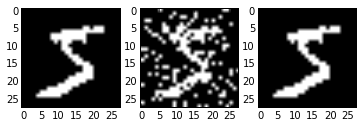

In [14]:
subplot(131); cshow(simages[0])
r = sign(simages[0]+randn(n))
subplot(132); cshow(r)
for i in range(100): r = sign(dot(W,r))
subplot(133); cshow(r)

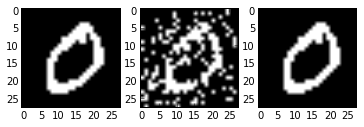

In [15]:
subplot(131); cshow(simages[1])
r = sign(simages[1]+randn(n))
subplot(132); cshow(r)
for i in range(100): r = sign(dot(W,r))
subplot(133); cshow(r)



Significance
============

Both Willshaw's and Hopfield's associative memories have generated enormous numbers
of citations and follow-on publications.

From a computational and statistical point, this is hard to understand.
Both approaches solve a problem that amounts to little more than a nearest
neighbor lookup, where "nearest neighbor" is defined not necessarily
by Hamming or Euclidean distance, but by some other generally reasonable
but fairly haphazard distance.
Furthermore, even out of McCulloch-Pitts neurons, it is much easier to
create better kinds of associative memories.

However, both approaches show how very simple Hebbian learning rules
can be used to build potentially useful pattern recognition systems
that learn from data (think about: why is associative memory useful 
for pattern recognition?). 
This means that they show that neural hardware, even in its most simplified
form, could be capable of learning, association, and memory tasks.

The extreme simplicity of either algorithm also means that very simple
analog hardware might be used for implementing it.  This was
particularly motivating for the original Lernmatrix approach.
But it might also become important again in nanotechnology, where
we may be able to generate very large computational structures
out of molecules, but without the kind of fine-grained control
that we have for regular VLSI chips.

Hopfield's network also illustrates that neural computation can be viewed
not as the computation of a static function, but as convergence
of a _dynamical system_ towards fixed points or attractors.
Hopfield networks also have mathematical connections to much more powerful
statistical methods as well as models in statistical mechanics, 
such as Boltzman machines, Ising models and Bayesian networks.
In addition, they are Turing universal in some sense.
Hopfield networks are also interesting as dynamical systems,
and their behavior can be described using Lyapunov functions.

Much of the work on these models has focused on exploring these mathematical
connections, as well as determining the "capacity" of these memories.

From a practical point of view, these models are of limited value.
Associative memories in real-world pattern recognition systems are
usually implemented using nearest neighbor methods, PCA, and similar 
techniques.  If you want to use these models for building "useful" 
associative memories, you need to be a lot more careful with the
conditions on the input vectors, as well as the details of the
implementation, than in the rough examples above.

(Significance)

History and utility:

- enormous academic interest, analysis
- computationally, little more than nearest neighbor
- little practical value
- little biological plausibility

Main contributions:

- shows how Hebbian learning can be used to create nearest neighbor systems out of random networks
- Hopfield demonstrates learning and computation in dynamical systems